In [1]:
import tensorflow as tf
import os
os.environ['CUDA_VISIBLE_DEVICES']='2'
import random
import time
import datetime
from dataloader import DataManager
import numpy as np
import pandas as pd

In [2]:
data_dir = '/home/rohanjain/data/sentgen/'
conf = {}
conf['word2vec_file'] = os.path.join(data_dir, 'vec.txt')
conf['relation2id_file'] = os.path.join(data_dir, 'RE/relation2id.txt')
conf['entity2id_file'] = os.path.join(data_dir, 'RE/entity2id.txt')
conf['sequence_length'] = 100
conf['vocab2id_file'] = './vocab2id.txt'
conf['training_file'] = os.path.join(data_dir, 'RE/train.txt')
datamanager = DataManager(conf)

In [3]:
training_data = datamanager.load_training_data_for_Gen()

Start loading training data for Generator.
RelationTotal: 53
Start cleaning training data for Generator.


KeyboardInterrupt: 

In [13]:
# seq_len=[]
# ent1p = []
# ent2p = []
# for data in training_data:
seq_len = [len(data.words_idx) for data in training_data]
ent1p = [data.entity1p for data in training_data]
ent2p = [data.entity2p for data in training_data]


In [15]:
seq_data = pd.DataFrame([seq_len, ent1p, ent2p]).T
seq_data.head()    

<bound method NDFrame.head of          0   1   2
0       41  25  23
1       27  19  17
2       44  15  13
3       39  37  11
4       40  16  14
5       51  11   9
6       26  14  12
7       20   7   5
8       17  15  13
9       14  12  10
10      47  12  32
11      43  18  10
12      39   3  31
13      43  18  10
14      39   3  31
15      27  15  23
16      34   5   0
17      18  16  14
18      28  23  21
19      43  10   8
20       6   4   2
21      47  29  40
22      47  29  40
23      50   6   8
24      27   8  10
25      41  15  39
26      61  27  35
27      24  10   8
28      46   5  14
29      44  40  42
...     ..  ..  ..
570058  42  27  29
570059  39   0   2
570060  38   8  10
570061  14   0   6
570062  43  12  16
570063  66  24  54
570064  69  20  36
570065  37  23  21
570066  39  15  17
570067  72  37  59
570068  52  21   0
570069  32  13  28
570070  29   9  14
570071  17   4  13
570072  22  19   8
570073  27   3   5
570074  16   8  12
570075  34  26  24
570076  50  44   5
5

In [17]:
seq_data.columns=['sentence_length', 'entity1_pos', 'entity2_pos']
seq_data.head() 

,sentence_length,entity1_pos,entity2_pos
0,41,25,23
1,27,19,17
2,44,15,13
3,39,37,11
4,40,16,14


In [19]:
seq_data.loc[seq_data.sentence_length>100].head()

,sentence_length,entity1_pos,entity2_pos
374,134,118,107
1141,106,102,83
1142,106,102,83
1837,154,91,109
1838,154,91,109


In [21]:
seq_data.loc[(seq_data.sentence_length>100)&((seq_data.entity1_pos>100)|(seq_data.entity2_pos>100))]

,sentence_length,entity1_pos,entity2_pos
374,134,118,107
1141,106,102,83
1142,106,102,83
1837,154,91,109
1838,154,91,109
2621,104,52,102
2669,104,52,102
2761,159,156,117
2981,159,156,117
3872,104,52,102


In [40]:
data_toberemoved = seq_data.loc[(seq_data.sentence_length>100)&((seq_data.entity1_pos>100)|(seq_data.entity2_pos>100))]
list(data_toberemoved.index)

[374,
 1141,
 1142,
 1837,
 1838,
 2621,
 2669,
 2761,
 2981,
 3872,
 3920,
 4012,
 4232,
 8552,
 10605,
 10610,
 16631,
 21830,
 22940,
 24328,
 25951,
 26353,
 29324,
 29843,
 31176,
 32794,
 32809,
 34912,
 36012,
 36018,
 36048,
 36338,
 37007,
 37713,
 37979,
 38433,
 38763,
 40215,
 40633,
 40985,
 41304,
 42710,
 43010,
 43236,
 43289,
 43403,
 43780,
 43946,
 43963,
 44471,
 44602,
 44737,
 45289,
 45290,
 45454,
 46194,
 46245,
 47164,
 47195,
 47355,
 47430,
 47777,
 48060,
 48082,
 48335,
 48471,
 49106,
 49588,
 49919,
 50278,
 50470,
 50725,
 50750,
 51356,
 51418,
 51778,
 53624,
 54497,
 54701,
 54944,
 56332,
 56641,
 57217,
 57673,
 57915,
 57916,
 58276,
 59093,
 59607,
 59729,
 60179,
 60685,
 61854,
 61949,
 62549,
 62960,
 63875,
 63886,
 64330,
 65440,
 66140,
 66374,
 66731,
 67627,
 67843,
 67957,
 68010,
 68778,
 69763,
 70133,
 70625,
 71379,
 71473,
 72501,
 72558,
 72782,
 72989,
 73009,
 73217,
 73494,
 73848,
 74253,
 74794,
 75072,
 75603,
 75638,
 75768,

In [45]:
# for elem in list(data_toberemoved.index):
#     try:
#         _ = training_data.pop(elem-1)
#     except IndexError:
#         print(elem)
#         raise

568268


IndexError: pop index out of range

In [47]:
# somelist = [i for j, i in enumerate(somelist) if j not in indices]
filtered_data = [i for j, i in enumerate(training_data) if j not in list(data_toberemoved.index)]

In [48]:
len(training_data) - len(filtered_data) == len(list(data_toberemoved.index))

True

In [49]:
[9]*3

[9, 9, 9]

In [44]:
len(training_data)

568921

748

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
n,bins,patches=plt.hist(seq_dis,10)
y=mlab.normpdf(bins,100,15)
plt.plot(bins,y)


In [ ]:
max(seq_dis)

In [ ]:
min(seq_dis)

In [23]:
import seaborn as sns
%matplotlib inline

In [27]:
sns.distplot(seq_data.sentence_length, log=True)

TypeError: distplot() got an unexpected keyword argument 'log'

In [ ]:
seq_dis[seq_dis>100]

In [ ]:
seq_dis>100

In [ ]:
sorted_seq_dis = sorted(seq_dis)

In [ ]:
sorted_seq_dis[:10]

In [ ]:
sorted_seq_dis[-10:]

In [ ]:
sorted_seq_dis[-1000:]

# Using matplotlib's hist function

In [29]:
from matplotlib.pyplot import hist

(array([  5.66341000e+05,   3.49500000e+03,   1.81000000e+02,
          5.50000000e+01,   1.20000000e+01,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

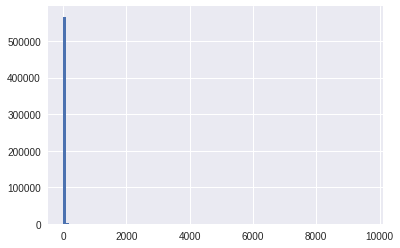

In [31]:
hist(seq_data.sentence_length, bins=100)

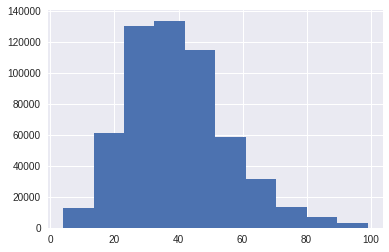

In [38]:
seq_data.sentence_length.loc[seq_data.sentence_length<100].hist()